# Loading functions

In [ ]:
from src.run_sim.sim_function import Simulation
from src.visualization.plots import *

# Set simulation parameters

In [14]:
params = {'number_of_servers': 1,
          'arrivals_per_hour': 300,
          'service_mins_per_server': 5,
          #'warm_up_time': 10,
          'max_hrs_time': 14}

In [15]:
sim = Simulation(**params)

In [16]:
# example on how to retrieve attributes
sim.arrivals_per_hour

300

# Run simulation!

In [ ]:
Q = sim.simulate_waiting_time()

# Extract simulation results

In [17]:
server_busy_time = Q.transitive_nodes
recs = Q.get_all_records()

In [18]:
# filter warm-up time of t mins

if sim.number_of_servers > 1:
    warm_up_time = 60
else:
    warm_up_time = 0

recs = [r for r in recs if r.arrival_date > warm_up_time]

In [19]:
waits = [r.waiting_time for r in recs]
average_waits = sum(waits) / len(waits)

# Plot waiting mean

In [20]:
plot_params = {k: params[k] for k in params.keys() if k != 'max_hrs_time'}

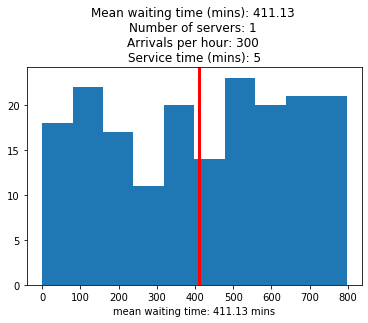

In [21]:
plot_waiting_mean(waits, average_waits, **plot_params)

In [22]:
print(f'Mean waiting time (mins): {round(average_waits, 2)} \nNumber of servers: {sim.number_of_servers} \nArrivals per hour: {sim.arrivals_per_hour} \nService time (mins): {sim.service_mins_per_server}')

Mean waiting time (mins): 411.13 
Number of servers: 1 
Arrivals per hour: 300 
Service time (mins): 5


In [23]:
print([(f'Service/Node {idx} is busy {round(k.server_utilisation*100, 2)}% of the time') for idx, k in enumerate(server_busy_time)][0])

Service/Node 0 is busy 99.99% of the time
